#### **Computational Intelligence in Manufacturing Systems**
#### **MFAIMFG**
###### Created by: Wynnezel Wayne Naoto P Akeboshi
##### Checked by: SME Academics Database team
##### Initial Publish: January 10, 2021
##### Assignment Code from the class of: Dr. Robert Kerwin Billones

### Machine Learning Exercise 1 - Linear Regression

#### **A LINE BY LINE EXPLANATION**

#### **CODE DESIGN**
#### Linear regression with one variable

##### **Code segment no. 1**
**Pandas**
</br>
Pandas is a python library mainly used for data manipulation and analysis. Pandas provides flexible and powerful control over datasets which helps organize and clean data.
</br>
</br>
**Numpy**
</br>
Numpy is a python library used for multi-dimensional arrays, matrices, and linear algebra. This library allows the use of high-level mathematics and operations to manipulate these arrays.
</br>
</br>
**Matplotlib**
</br>
Matplotlib is a python library that serves as an extension to numpy. This library allows the visualization of data and is used for embedding data plots onto GUI toolkits.

In [1]:
import numpy as np
# literally imports numpy library with alias np (can be any other alias you want). to call numpy functions and methods use np.functionname()
# numpy is used for linear algebra, matrix operations, arrays, etc.
import pandas as pd
# literally imports the pandas library with alias pd (can be any alias).
# pandas is used for viewing csv, xlsx, and other files that can be made into tables aka data frames.
import matplotlib.pyplot as plt
# calls matplotlib (a library) and retrieves specifically the pyplot (a sub-library). Only the pyplot sub-library is imported with alias plt.
# pyplot is used for data visualization. creates line charts, graphs, scatter plots, etc.

%matplotlib inline

##### **Code segment no. 2**
This segment imports the operating system's library. The second line selects a direct path to the data text file. The third line reads the text file and adds the labels, population and profit, to each column respectively.

In [8]:
import os
# imports your local operating system (os) library.
# os is used for using commands in your operating system.
path = 'ex1data1.txt'
# gets current working directory (cwd) where your current notebook exists. 
# then adds '/data/ex1data1.txt' into the returned directory and assigned to variable path.
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# .readcsv is a pandas function (hence the pd.read_csv) that takes specific parameters in reading a csv file.
data.head()
# .head() is a function for dataframes (in this case the variable data is a dataframe - a pandas datatype) and 
# presents the first 5 entries.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [11]:
os.getcwd?
#adding ? after a function instead of () displays the documentation and syntax for that specific function

Signature: os.getcwd()
Docstring: Return a unicode string representing the current working directory.
Type:      builtin_function_or_method


##### **Code segment no. 3**
The describe method is a function found in the pandas library. This provides quantitative descriptions of a dataset. It provides information on this dataset such as number of entries, statistical mean, and standard deviation.

In [3]:
data.describe()
# .describe is a function for dataframes (again a dataframe is a pandas datatype aka a table)
# .describe shows a summary of the dataset. ie means, min, max, standard deviation, etc

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##### **Code segment no. 4**
Through the matplotlib library, this line of code presents a plot using the given dataset. This function takes in parameters such as the kind of plot and which columns of data serves as the x and y-axis.

<AxesSubplot:xlabel='Population', ylabel='Profit'>

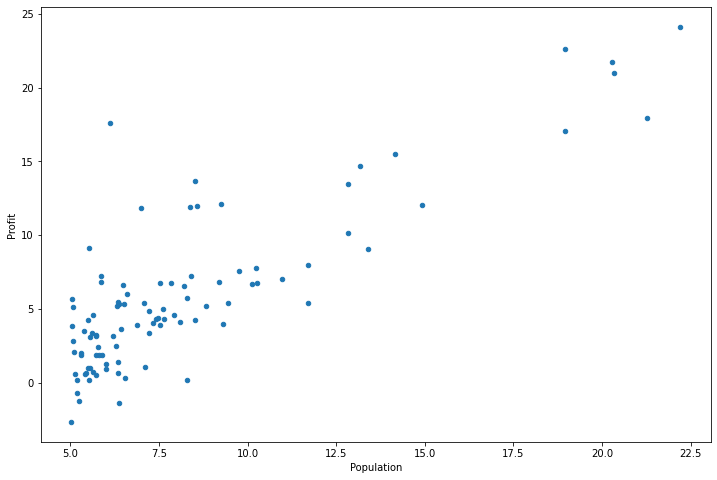

In [12]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
# .plot is a function under pyplot that can read dataframes. you enter parameters to 'decorate' your graph. in this case,
# it takes the kind, the size, and what is the label of x and y values.

##### **Code segment no. 5**
This code defines a function called computeCost() with 3 input paramaters named X, y, and theta. This function then returns a value using the given formula.

In [40]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
# this is the Jtheta formula as described in the pdf. the entire function is simply the formula taking in the variables
# to solve for Jtheta. Cost in this case calculates the error.

##### **Code segment no. 6**
The insert function is a function found in the pandas library. This function inserts based on the given location, a column label, and a data value. In this code, it creates a Ones column in the 0th column (Zero-based numbering) with the column containing the value 1. 

In [41]:
data.insert(0, 'Ones', 1)
# .insert is a pandas function that allows the insertion of an entire column. adding a ones column is necessary
# to make the following matrix computations easier.

##### **Code segment no. 7**
The shape function identifies the size of the dataset. Using the first parameter, the shape function returns the number of columns. The values for X (training data) and y (target variable) are then set using the iloc function which identifies a set of data within a dataset. 

In [42]:
cols = data.shape[1]
# .shape returns the size (rows, columns) of the dataframe. inserting 0 or 1 determins whether only rows or columns are 
# shown. In this case, shape[1] returns the number of columns and is saved in the cols variable.
X = data.iloc[:,0:cols-1]
# .iloc is the identification of a specific reference using index instead of labels. in this case, it retrieves every row
# (min:max,) and columns from 0 (zero based numbering) until cols-1 (,0:cols-1). Whatever is retrieved is assigned to X.
y = data.iloc[:,cols-1:cols]
# in this case, it takes all rows, then takes all columns from cols-1 to cols. this is then assigned to y.

In [43]:
print ('.shape[0] (rows) = {0}\n.shape[1] (columns) = {1}'.format(data.shape[0], data.shape[1]))

.shape[0] (rows) = 97
.shape[1] (columns) = 3


##### **Code segment no. 8**
Presents the first 5 entries of a given dataframe

In [44]:
X.head()
# referring to code segment 2, presents the first 5 entries of the X dataframe

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


##### **Code segment no. 9** 
Presents the first 5 entries of a given dataframe

In [45]:
y.head()
# referring to code segment 2 and 8, presents the first 5 entries of the y dataframe

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


##### **Code segment no. 10**
The matrix functions return a two-dimensional matrix based on given data.

In [46]:
X = np.matrix(X.values)
# literally converts a dataframe into a matrix using numpy. .values is a function used to retrieve only values 
# not including labels and index.
y = np.matrix(y.values)
# literally converts y dataframe into a matrix. this allows matrix operations to be done.
theta = np.matrix(np.array([0,0]))
# creates a matrix called theta. the values of this matrix is filled using array [0,0]

##### **Code segment no. 11**
By entering the variable name, it returns the value of of the variable

In [47]:
theta
# np.array would return an array, but in code segment 10, this array was immediately set as values for
# a new matrix called theta. thus it shows matrix(with values 0,0) instead of array(with values 0,0)

matrix([[0, 0]])

##### **Code segment no. 12**
The shape function returns the size of the arrays based on the number of rows then columns.

In [48]:
X.shape, theta.shape, y.shape 
# if .shape function does not include index parameters like .shape[0] or .shape[1], it returns (rows,columns)

((97, 2), (1, 2), (97, 1))

##### **Code segment no. 13**
Returns the computed cost using the earlier defined function

In [49]:
computeCost(X, y, theta)
# computes the cost per value of X and per value of y using the previously entered formula. this is a lot of tedious math
# so luckily we made a function for it. basically, computers J theta based on the X matrix, y matrix, and theta matrix.

32.072733877455676

##### **Code segment no. 14**
This is where the gradient descent function is defined with 5 input parameters. In this function, the cost function is minimized.

In [55]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        #cost here is constantly computed after each attempt. theta is what is being adjusted to minimize cost.
        
    return theta, cost

# again, this is a lot of math. gradient descent in its simplest form simply optimizes by repeatedly trying to minimize
# cost. using this function it tries a number of times (iterations or iters variable). Each time it tries, it checks that
# using this theta returns this amount of cost, mathematically (hence d formula) we have to adjust to identify a new theta
# with the new theta, we check cost again.
# a list of costs at each attempt is saved into the cost variable.
# the theta, or the optimized weight of each variable, and the list of costs at each iteration is returned.

##### **Code segment no. 15**
This is where our alpha and number of iterations is set into their respective variables.

In [56]:
alpha = 0.01
# alpha is the learning rate. can be adjusted to any in how fast you want your function to learn.
# too high learning rate means changes or adjustments are too big. this may lead to a sub-optimal (not best) solution.
# too low learning rate means changes are too small. this may never arrive to a solution.
iters = 1000
# iters is the number of iterations or attempts this model will make.

##### **Code segment no. 16**
Variables g and cost will be set to be equal to the return value of the gradientDescent function.

In [57]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g
# g in this case is the gradient, or the returned optimal theta. the best solution it could offer basically.
# cost is simply the list of costs within the function. 

# why are there two costs? cost in the function segment 14 can only be access, viewed, manipulated WITHIN the function. 
# basically nobody else outside the function can see it, use it, or ever assess it. this is what we call a LOCAL variable.
# cost in this line, on the other hand, can be accessed, viewed, and manipulated ANYWHERE in your program. basically,
# everybody can see it, use it, or change it. this is what we call a GLOBAL variable

matrix([[-3.24140214,  1.1272942 ]])

##### **Code segment no. 17**
The new compute cost is calculated using the computeCost function but using the value of g as a parameter instead of the previous theta.

In [28]:
computeCost(X, y, g)
# this attempt is to identify the error using the optimized (best solution) weights determined by the gradient descent.
# g is the best fit with the least error across all points of the data.

4.515955503078912

##### **Code segment no. 18**
A new prediction line is overlayed onto the previously used scatter plot. This prediction line is the linear regression using one variable which fit the provided dataset. The following lines simply properly formats the graph below.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

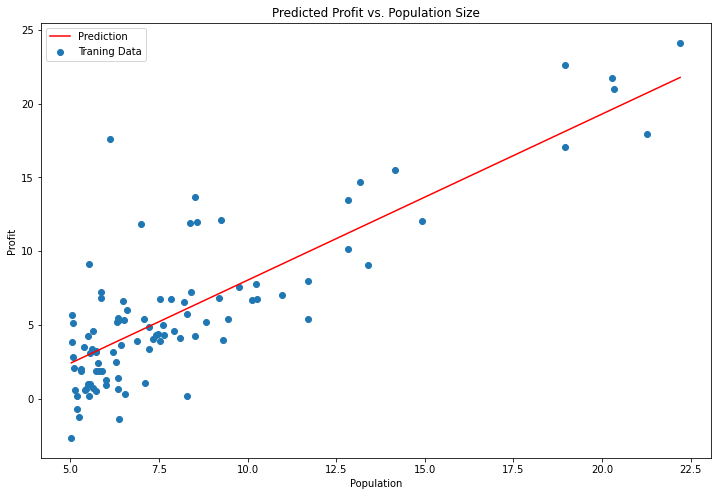

In [69]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
# based on documentation, this simply creates a list of values that is evenly spaced. like how we want numbers from 
# 1-10 to be evenly spaced by 2, we get 2,4,6,8,10. this function takes a starting point, end point, then spacing.

f = g[0, 0] + (g[0, 1] * x)
# f here is a line function in the form y = mx + b, where y = f, b = g[0,0], and m = g[0,1]. this is the red line.

fig, ax = plt.subplots(figsize=(12,8))
# creates a plot/graph called fig with its subplot called ax. subplot is a subclass of figures.

ax.plot(x, f, 'r', label='Prediction')
# the plot of ax (which is within fig) creates a line which takes the list of values x in the x-axis and f in the y-axis.
# it is labeled as 'prediction'

ax.scatter(data.Population, data.Profit, label='Traning Data')
# creates another plot within fig. this time it creates a scatter plot, taking in population data in the x-axis and profit
# in the y-axis

ax.legend(loc=2)
# creates a legend
ax.set_xlabel('Population')
# sets the label for the x-axis
ax.set_ylabel('Profit')
# sets label for the y-axis
ax.set_title('Predicted Profit vs. Population Size')
# sets title for the entire Figure called fig.


##### **Code segment no. 19**
This code presents the computed cost as it is being minimized through the number of iterations. This graph shows that as a thousand iterations is reached, the cost approaches 0.

Text(0.5, 1.0, 'Error vs. Training Epoch')

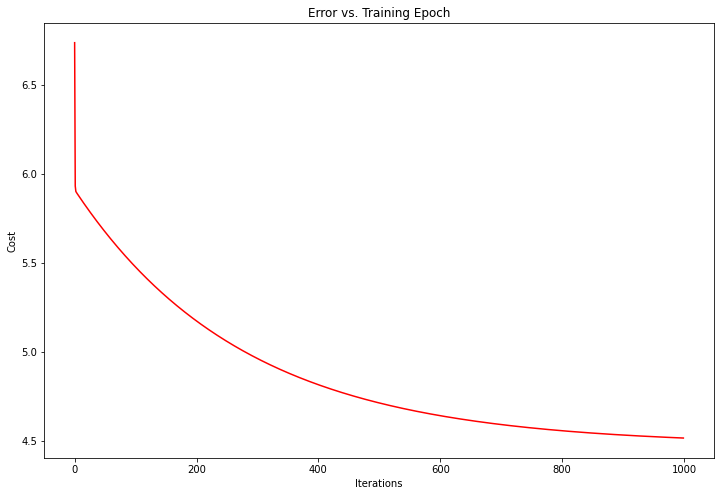

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
# creates a figure called fig, and a subplot ax. 
ax.plot(np.arange(iters), cost, 'r')
# creates a plot within fig. np.arange(iters) creates a list of values from 0 to parameter. in this case, creates one from
# 0 to 1000. then the y values are set to be cost (see segment 16). this graph will now show how cost changed per iteration.

ax.set_xlabel('Iterations')
# sets label of x-axis as iterations
ax.set_ylabel('Cost')
# sets label of y-axis as cost
ax.set_title('Error vs. Training Epoch')
# sets title of the figure

#### Linear regression with multiple variables
##### **Code segment no. 20**
This section of code determines a path to a new dataset file labeled ex1data2.txt. This dataset is then formatted and read using the pandas library to be further manipulated.

In [72]:
path = 'ex1data2.txt'
# retrieves current working directory, then creates a path towards the specific file.

data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
# reads a csv file in path called path. assigned with no headers but assigned with 3 column names.

data2.head()
# presents the first 5 data entries.

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


##### **Code segment no. 21**
The Z-score for each entry is identified using the formula and stored in data2. Then the first 5 entries of the dataset are presented.

In [73]:
data2 = (data2 - data2.mean()) / data2.std()
# data is normalized through the Z-score. in size, changing from 2100 to 2104 may be a small difference
# but in number of bedrooms, changing from 4 to 8 is an extremely large difference. using z-score equalizes the weight
# relative to a data type. like how a grade changing from 98 to 100 is a big change but cost from P98.00 to P100.00 is 
# a small change. 

data2.head()
# presents the first 5 data entries.

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


##### **Code segment no. 22**
The insert function in this line adds a column labeled Ones with a value of 1 in the 0th column.

In [74]:
data2.insert(0, 'Ones', 1)
# insert is a function under pandas (and numpy) which allows the manipulation of a dataframe. allows the inserting of an
# entire column. this is done in this context to make matrix operations easier.

##### set X (training data) and y (target variable)

In [75]:
cols = data2.shape[1]
# gets the number of columns and saves it in cols variable.
X2 = data2.iloc[:,0:cols-1]
# gets all rows and columns from 0 to cols -1. saves it in X2
y2 = data2.iloc[:,cols-1:cols]
# gets all rows and columns from cols-1 to cols. saves it in y2

##### convert to matrices and initialize theta

In [76]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
# all values are convertied into matrices. 
#theta2 is now 0,0,0 compared to theta being 0,0. this is because there are 3 input variables instead of the previous 2.

##### perform linear regression on the data set

In [77]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
# a lot of linear algebra. optimizes a solution for x2 and y2 to return to the optimal solution. 
# returns g2 as the best solution and a list of costs (cost2) of each iteration attempt.

##### get the cost (error) of the model

In [78]:
computeCost(X2, y2, g2)
# computes for the current cost based on the most optimal solution. g2 is the best solution wherein error (or called cost)
# is minimized across all data points.

0.1307033696077189

##### **Code segment no. 23**
Similar to the linear regression with one variable, the cost here is once again minimized and presented as the number of iterations are increased.

Text(0.5, 1.0, 'Error vs. Training Epoch')

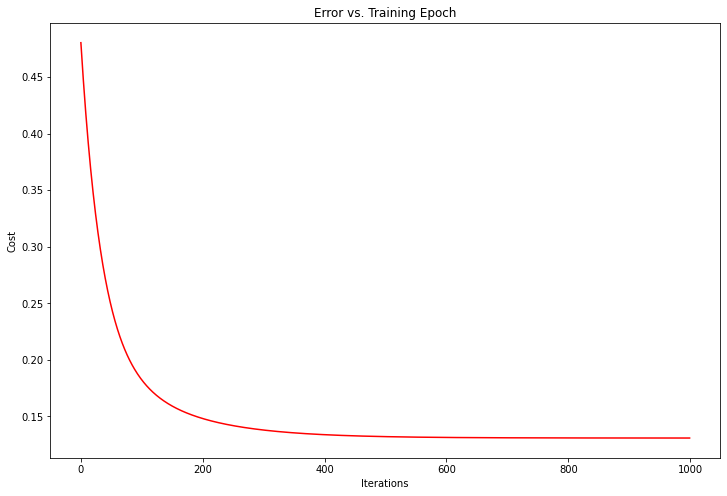

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
# creates figure called fig, with subplot called ax.

ax.plot(np.arange(iters), cost2, 'r')

# creates a plot with x values being everything from 0 to number of iterations, and with y values being the cost2 in each
# attempted iteration.

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
# sets x and y labels and the title for the figure.

##### **Code segment no. 24**
This code segment creates a linear regression model based on the values of X and y using the sklearn library.

In [81]:
from sklearn import linear_model
# imports linear_model sublibrary from the sklearn library. similar to how ONLY pyplot is imported from the matplotlib library.
model = linear_model.LinearRegression()
#creates a model called model with datatype being LinearRegression()
model.fit(X, y)
# this linear model uses .fit function to create a fit prediction for the input parameters. X and y is the input parameters
# in linear regression with 1 variable.

LinearRegression()

##### **Code segment no. 25**
A predictive line is overlayed onto the scatter plot. The prediction line is the new linear regression using multiple variables compared to the scatter plot of the given data.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

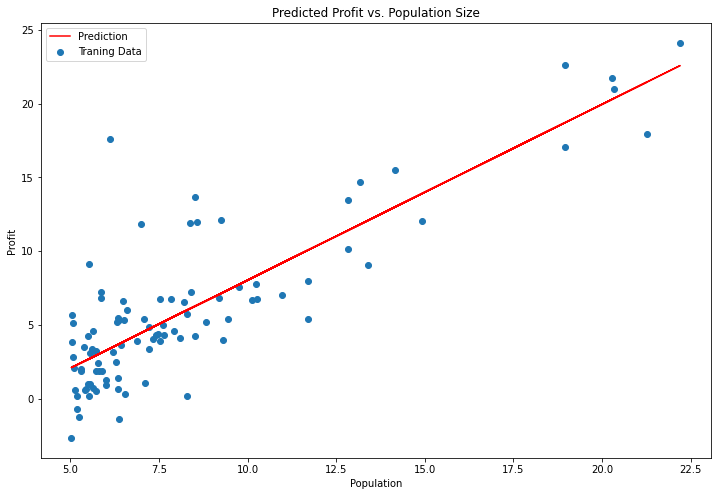

In [94]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
# creates an array of datapoints including all rows and column 1.
# creates a predicted line (list of y values) using the .predict function.

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
# displays all relevant data exactly the same as segment 18. but the prediction line is done automatically
# using the .fit function within sklearn.